# Services Price Prediction Deployment using Linear Regression
---  ------                       --------------   -----  
In this notebook, we would like to predict services price of uber/lft based on influencing predictors using Linear Regression

## Problem Statement
---  ------                       --------------   -----  
Ride-sharing is a transportation service that is oriented to the driver or vehicle owner. So, passengers cannot make direct orders like in ride-hailing (e.g. Gojek), but must adjust the route with the driver who offers the seat.

Uber and Lyft are two popular ride-sharing services that are available in many major cities. Both have most of the same services. We call the driver with the app on our smart phone. The driver arrives, already knowing our intended destination. Then we receive an estimate of the cost before the trip begins. handled via pre-approved credit card, without cash changing hands. Once they learn to avoid common mistakes, budget travelers turn to Uber and Lyft to their advantage.

Both services have experienced rapid growth and strong attention from budget travelers. Each of them have developed a loyal customer base. Both Lyft and Uber take advantage of an annoying and possibly expensive strategy called buy-in pricing, where we will pay many times the regular rate in high-demand situations (surge multiplier). How the surge multiplier is in a city varies widely between the two services.

They are greatly affected by the demand and supply of rides at a given time. We would like to understand what drives the demand of the rides and how the prices vary with distance and surge of budget travelers. 

But which one is better? how is the price prediction for uber/lyft?


## Data Source
Kaggle : Uber and Lyft Dataset Boston, MA ( https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma )

## Data Attributes
Total : 693071 rows × 56 variables

| No | Variables                   |
| -- | :-------------------------- |
| 1  | timestamp                   |
| 2  | hour                        |
| 3  | day                         |
| 4  | month                       |
| 5  | datetime                    |
| 6  | timezone                    |
| 7  | source                      |
| 8  | destination                 |
| 9  | cab_type                    |
| 10 | product_id                  |
| 11 | name                        |
| 12 | price                       |
| 13 | distance                    |
| 14 | surge_multiplier            |
| 15 | latitude                    |
| 16 | longitude                   |
| 17 | temperature                 |
| 18 | apparentTemperature         |
| 19 | short_summary               |
| 20 | long_summary                |
| 21 | precipIntensity             |
| 22 | precipProbability           |
| 23 | humidity                    |
| 24 | windSpeed                   |
| 25 | windGust                    |
| 26 | windGustTime                |
| 27 | visibility                  |
| 28 | temperatureHigh             |
| 29 | temperatureHighTime         |
| 30 | temperatureLow              |
| 31 | temperatureLowTime          |
| 32 | apparentTemperatureHigh     |
| 33 | apparentTemperatureHighTime |
| 34 | apparentTemperatureLow      |
| 35 | apparentTemperatureLowTime  |
| 36 | icon                        |
| 37 | dewPoint                    |
| 38 | pressure                    |
| 39 | windBearing                 |
| 40 | cloudCover                  |
| 41 | uvIndex                     |
| 42 | visibility.1                |
| 43 | ozone                       |
| 44 | sunriseTime                 |
| 45 | sunsetTime                  |
| 46 | moonPhase                   |
| 47 | precipIntensityMax          |
| 48 | uvIndexTime                 | 
| 49 | temperatureMin              |
| 50 | temperatureMinTime          | 
| 51 | temperatureMax              |
| 52 | temperatureMaxTime          | 
| 53 | apparentTemperatureMin      |
| 54 | apparentTemperatureMinTime  |
| 55 | apparentTemperatureMax      |
| 56 | apparentTemperatureMaxTime  |

## Objective:
---  ------                       --------------   -----  
    1. Get a good dataset with clear variables
    2. Get complete and easy-to-understand informationTo understand the factors that influence the price of a cab 
    3. Get a clear partition of data for modeling
    4. Get a good linear regression model
    5. To predict services prices based on influencing factors

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso

## Loading Data

In [2]:
df = pd.read_csv('dataset/rideshare_kaggle.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.44               1.0   
1     Lyft  lyft_premier           Lux   11.0      0.44               1.0   
2     Lyft          lyft          Lyft    7.0      0.44               1.0   
3     Lyft   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     Lyft     lyft_plus       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  temperature  apparentTemperature    short_summary  \
0   42.2148    -71.033        42.34                37.12   Mostly Cloudy    
1   42.2148    -71.033        43.58                37.35            Rain    
2   42.2148    -71.033        38.33                32.93           Clear    
3   42.2148    -71.033        34.38                29.63           Clear    
4   42.2148    -71.033        37.44                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

the dataset consists of columns with **29 float types, 17 integers, and 11 objects**. In addition, **price** has a non-null number which is **only 637976** of 693071 data, meaning that there is a null value in it which we need to deal with cleaning data.

In [5]:
df.describe()

timestamp           hour            day          month  \
count  6.930710e+05  693071.000000  693071.000000  693071.000000   
mean   1.544046e+09      11.619137      17.794365      11.586684   
std    6.891925e+05       6.948114       9.982286       0.492429   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543737e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  637976.000000  693071.000000     693071.000000  693071.000000   
mean       16.545125       2.189430          1.013870      42.338172   
std         9.324359       1.138937          0.091641       0.047840   
min         2.500000       0.020000          1.000000      42.214800   
25%         9.000000       1.280000          1.000000      42.350300   
50%        13.500000       2.160000          1.000000      42.351900   
75%        22.500000       2.920000          1.000000      42.364700   
max        97.500000       7.860000          3.000000      42.366100   

           longitude    temperature  apparentTemperature  precipIntensity  \
count  693071.000000  693071.000000        693071.000000    693071.000000   
mean      -71.066151      39.584388            35.881222         0.008922   
std         0.020302       6.726084             7.918707         0.026901   
min       -71.105400      18.910000            12.130000         0.000000   
25%       -71.081000      36.450000            31.910000         0.000000   
50%       -71.063100      40.490000            35.900000         0.000000   
75%       -71.054200      43.580000            40.080000         0.000000   
max       -71.033000      57.220000            57.220000         0.144700   

       precipProbability       humidity      windSpeed       windGust  \
count      693071.000000  693071.000000  693071.000000  693071.000000   
mean            0.146076       0.741119       6.186253       8.469860   
std             0.328938       0.138595       3.148223       5.289179   
min             0.000000       0.380000       0.450000       0.800000   
25%             0.000000       0.640000       3.410000       4.060000   
50%             0.000000       0.710000       5.910000       7.550000   
75%             0.000000       0.880000       8.410000      11.740000   
max             1.000000       0.960000      15.000000      27.250000   

       windGustTime     visibility  temperatureHigh  temperatureHighTime  \
count  6.930710e+05  693071.000000    693071.000000         6.930710e+05   
mean   1.544049e+09       8.467970        45.040982         1.544050e+09   
std    6.928244e+05       2.602888         5.996541         6.937921e+05   
min    1.543151e+09       0.717000        32.680000         1.543154e+09   
25%    1.543432e+09       8.432000        42.570000         1.543439e+09   
50%    1.543756e+09       9.880000        44.680000         1.543788e+09   
75%    1.544846e+09       9.996000        46.910000         1.544814e+09   
max    1.545127e+09      10.000000        57.870000         1.545160e+09   

       temperatureLow  temperatureLowTime  apparentTemperatureHigh  \
count   693071.000000        6.930710e+05            693071.000000   
mean        34.150736        1.544102e+09                41.614054   
std          6.383163        6.922923e+05                 7.666138   
min         17.850000        1.543234e+09                22.620000   
25%         30.170000        1.543489e+09                36.570000   
50%         34.180000        1.543817e+09                40.950000   
75%         38.730000        1.544836e+09                44.120000   
max         46.600000        1.545221e+09                57.200000   

       apparentTemperatureHighTime  apparentTemperatureLow  \
count             

so there are almost **46 columns** with numerical value we will hand-picked a few to explain a regression model to predict the price of uber and lyft rideshares.

## Data Cleaning

In [6]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Missing value was found in the price variable of **3245 data**, therefore we have to deal with that. **Look at the skewness:**

In [7]:
x = pd.Series(df["price"])
print(x.skew())

1.0457470560899256


skewness is not close to 0 (between 0.5 and 0.5), then the dataset is considered not symmetrical enough. A positive value means that the distribution is **positively skewed**. Then the distribution is skewed to the right, the tail on the right side of the curve is longer than the tail on the left, and the mean is larger than the mode. The median frequency is more than the mean so that **the median is used** to handle missing values

In [8]:
median = df["price"].median()
df["price"].fillna(median, inplace=True)

In [9]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

## EDA (Exploratory Data Analysis)

**Question :** Uber vs Lyft, which is the most booked services?

In [10]:
df_transport = df['cab_type'].value_counts()
df_transport

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

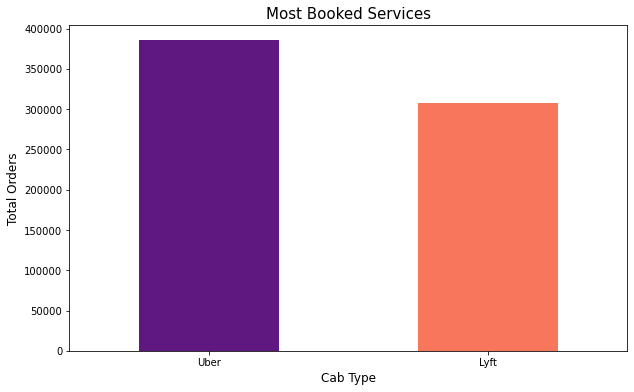

In [11]:
df_transport.plot(kind="bar", figsize=(10, 6), color=['#5f187f', '#f8765c'])

plt.title("Most Booked Services", fontsize=15)
plt.ylabel("Total Orders", fontsize=12)
plt.xlabel("Cab Type", fontsize=12)
plt.xticks(rotation='horizontal')


plt.show()

**Conclusion :** 

By looking at the total orders between Uber and Lyft, it can be concluded that **Uber is used more often than Lyft** with a total of 330568 orders.

**Question :** What is the total daily orders from Uber and Lyft during this November and December?

In [12]:
df2 =df.groupby(by=["day", "cab_type"]).size().reset_index(name="counts")
df2.head()

day cab_type  counts
0    1     Lyft   20289
1    1     Uber   24951
2    2     Lyft   19845
3    2     Uber   25083
4    3     Lyft   20021

<AxesSubplot:xlabel='day', ylabel='counts'>

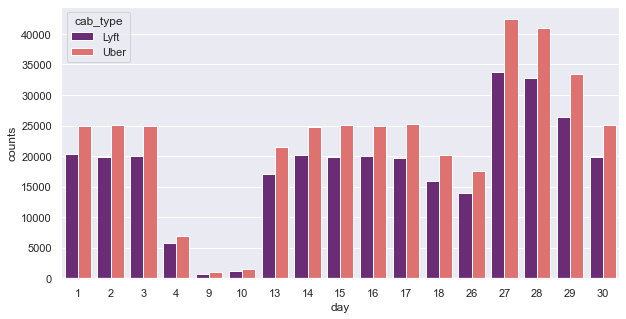

In [13]:
df2.sort_values('cab_type', inplace=True)
sns.set(rc={'figure.figsize':(10,5)})

sns.barplot(data=df2,
            y='counts', 
            x='day',
            hue='cab_type', 
            palette='magma')

**Conclusion :** 

It can be seen in the graph that the daily orders from **Uber every day are always higher than the daily orders from Lyft**. From this daily order chart, it can also be concluded that Uber is used more often than Lyft. The highest total daily orders from Uber were on the 27th with 42366 orders and the lowest was on the 9th with 1006. While the highest total daily orders from Lyft were also on the 27th with 33755 orders and the lowest on the 9th with 668.

**Question :** What was the percentage of Uber and Lyft orders in November and December 2018?

In [14]:
months = pd.DataFrame(df['month'].value_counts().index, columns=["month"])
months['counts'] = df['month'].value_counts().values
months

month  counts
0     12  406614
1     11  286457

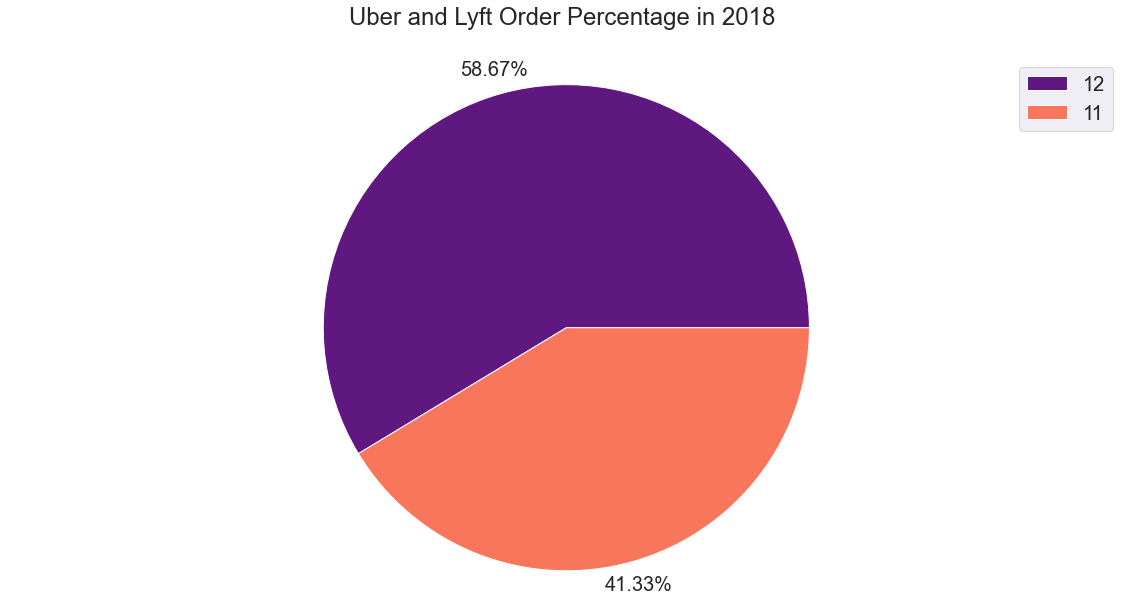

In [15]:
ax = df['month'].value_counts()
ax.plot(kind="pie", 
        figsize=(20,10),  
        autopct="%1.2f%%", 
        labels=None, 
        colors=('#5f187f', '#f8765c'),  
        pctdistance=1.1, 
        fontsize=20)
plt.title('Uber and Lyft Order Percentage in 2018 \n', fontsize=24)
plt.ylabel('')
plt.axis('equal')
plt.legend(ax.index, loc='upper right', fontsize=20)

plt.show()

**Conclusion :**

From the results of the graph above, it can be seen that for the period November - December 2018, Uber and Lyft orders were higher in **December** with a percentage of **58.67%** of the total orders. So in this case there is an increase in orders by 17.34%

**Question :** Does the type of cars used by Uber and Lyft affect the travel rate?

In [16]:
df_name = df.groupby(["cab_type", 'name'])['price'].mean().reset_index(name="mean_price")
df_name

cab_type          name  mean_price
0      Lyft           Lux   17.771240
1      Lyft     Lux Black   23.062468
2      Lyft  Lux Black XL   32.324086
3      Lyft          Lyft    9.610885
4      Lyft       Lyft XL   15.309363
5      Lyft        Shared    6.029893
6      Uber         Black   20.523786
7      Uber     Black SUV   30.286763
8      Uber          Taxi   13.500000
9      Uber      UberPool    8.752500
10     Uber         UberX    9.765074
11     Uber        UberXL   15.678144
12     Uber           WAV    9.765019

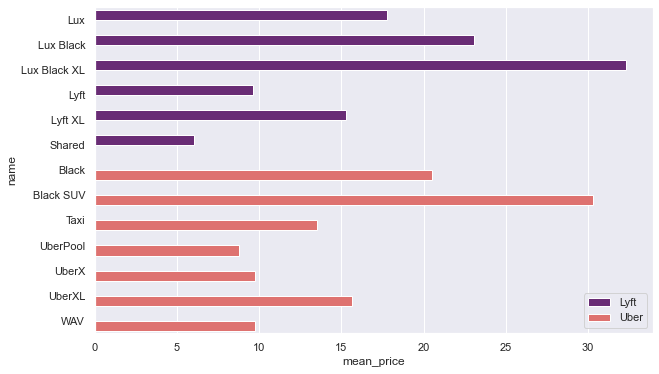

In [17]:
sns.set(rc={'figure.figsize':(10, 6)})

sns.barplot(y='name', 
            x='mean_price',
            data=df_name,
            hue='cab_type', 
            palette = 'magma')
plt.legend(loc='lower right')

**Conclusion :** 

Based on the graph above, it can be seen that the type of cars owned by Uber and Lyft affects the price of the trip that will be charged to passengers.

based on datasets and graphs :
- The most expensive Lyft service is Lux Black XL with an average price of 30.50 USD and the cheapest service is Shared with an average price of 5.99 USD.


- The most expensive Uber service is the Black SUV with an average price of 30.29 USD and the cheapest service is UberPool with an average price of 8.75 USD.

**Question :** How is the correlation between the distance and the travel rates (price) of each cab type?

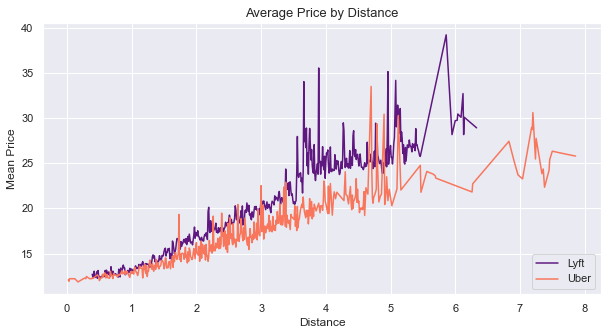

In [18]:
fig , ax = plt.subplots(figsize = (10, 5))
ax.plot(df[df['cab_type'] == 'Lyft'].groupby('distance')['price'].mean(), label = 'Lyft', color = '#5f187f')
ax.plot(df[df['cab_type'] =='Uber'].groupby('distance')['price'].mean(), label = 'Uber', color = '#f8765c')
ax.set_title('Average Price by Distance', fontsize= 13)
ax.set(xlabel = 'Distance', ylabel = 'Mean Price')
ax.legend(loc='lower right')
plt.show()

In [19]:
dist_price = df.pivot_table(values='distance',
                       index=['cab_type'],
                       columns=['day','month','price'],
                       aggfunc=np.mean,
                       fill_value=0)
dist_price = dist_price.T
dist_price = dist_price.reset_index(drop=False)

dist_price.sort_values('price', ascending=False, inplace=True)
print('Harga Tertinggi:')
print(dist_price.head(10))

Harga Tertinggi:
cab_type  day  month  price  Lyft  Uber
224         2     12   97.5  4.43  0.00
1166       17     12   92.0  5.36  0.00
110         1     12   92.0  5.37  0.00
822        14     12   92.0  4.39  0.00
708        13     12   92.0  3.75  0.00
1501       27     11   92.0  4.57  0.00
1047       16     12   92.0  4.37  0.00
1738       29     11   92.0  5.39  0.00
1623       28     11   92.0  3.89  0.00
1855       30     11   89.5  0.00  7.46


**Conclusion :**


Based on the graph above, it can be seen that the greater the distance traveled by Uber and Lyft, the greater the fare charged. Lyft products have higher fares than Uber even though the distance covered is not as big as Uber. The highest fare for Lyft on December 2nd was 97.5 USD while Uber on November 30th was 89.5 USD

**Question :** Is the weather one of the factors that affect the surge in orders resulting in an increase in travel fares?

In [20]:
ss_price = df.pivot_table(values='price',
                          index=['surge_multiplier'],
                          columns=['cab_type', 'short_summary'],
                          fill_value=0)
ss_price.T

surge_multiplier                  1.00       1.25       1.50       1.75  \
cab_type short_summary                                                    
Lyft      Clear              16.519477  23.563738  28.963102  33.220085   
          Drizzle            16.689300  24.076190  28.436170  31.840909   
          Foggy              16.682484  24.005650  30.913333  33.087500   
          Light Rain         16.589515  23.796782  28.779948  32.702247   
          Mostly Cloudy      16.593640  23.724283  29.009285  33.342241   
          Overcast           16.574693  23.750371  29.377551  34.279861   
          Partly Cloudy      16.622169  24.095661  28.335751  33.038540   
          Possible Drizzle   16.539725  23.008361  26.988372  35.623188   
          Rain               16.581970  23.615183  27.435897  36.976190   
Uber      Clear              15.403008   0.000000   0.000000   0.000000   
          Drizzle            15.464516   0.000000   0.000000   0.000000   
          Foggy              15.315342   0.000000   0.000000   0.000000   
          Light Rain         15.502959   0.000000   0.000000   0.000000   
          Mostly Cloudy      15.508915   0.000000   0.000000   0.000000   
          Overcast           15.467694   0.000000   0.000000   0.000000   
          Partly Cloudy      15.451432   0.000000   0.000000   0.000000   
          Possible Drizzle   15.489824   0.000000   0.000000   0.000000   
          Rain               15.489977   0.000000   0.000000   0.000000   

surge_multiplier                  2.00       2.50       3.00  
cab_type short_summary                                        
Lyft      Clear              40.725490  33.750000   0.000000  
          Drizzle            36.684211  18.000000   0.000000  
          Foggy              29.595238  22.500000   0.000000  
          Light Rain         40.134831  33.361111  32.833333  
          Mostly Cloudy      39.313910  30.583333  37.750000  
          Overcast           38.325532  26.912500  35.666667  
          Partly Cloudy      39.012262  29.666667  62.500000  
          Possible Drizzle   36.697917  37.750000   0.000000  
          Rain               39.547619  25.500000  65.000000  
Uber      Clear               0.000000   0.000000   0.000000  
          Drizzle             0.000000   0.000000   0.000000  
          Foggy               0.000000   0.000000   0.000000  
          Light Rain          0.000000   0.000000   0.000000  
          Mostly Cloudy       0.000000   0.000000   0.000000  
          Overcast            0.000000   0.000000   0.000000  
          Partly Cloudy       0.000000   0.000000   0.000000  
          Possible Drizzle    0.000000   0.000000   0.000000  
          Rain                0.000000   0.000000   0.000000

In [21]:
ss_price.loc['mean'] = ss_price.mean()
ss_price = ss_price.T
ss_price = ss_price.reset_index(drop=False)

ss_price.sort_values('mean', ascending=False, inplace=True)

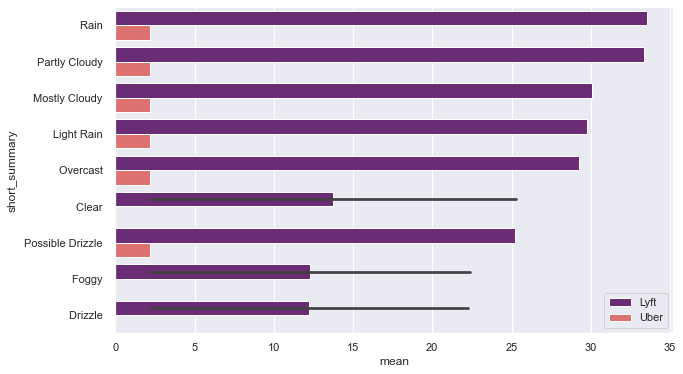

In [22]:
sns.set(rc = {'figure.figsize':(10, 6)})
sns.barplot(x ='mean', 
            y ='short_summary', 
            hue = df.cab_type, 
            data =ss_price, 
            palette = 'magma')
plt.legend(loc='lower right')

**Conclusion :** 

Weather is very influential on the surge in orders resulting in increased travel fares. Based on the graph above, it is known that the weather that has the most influence on the surge in orders is during **Rain** and **Partly Cloudy**. To see the surge in orders due to the weather can be seen as follows.

In [23]:
ss_price.drop(columns=['mean'], inplace=True)
ss_price

surge_multiplier cab_type       short_summary        1.0       1.25  \
8                    Lyft               Rain   16.581970  23.615183   
6                    Lyft      Partly Cloudy   16.622169  24.095661   
4                    Lyft      Mostly Cloudy   16.593640  23.724283   
3                    Lyft         Light Rain   16.589515  23.796782   
5                    Lyft           Overcast   16.574693  23.750371   
0                    Lyft              Clear   16.519477  23.563738   
7                    Lyft   Possible Drizzle   16.539725  23.008361   
2                    Lyft              Foggy   16.682484  24.005650   
1                    Lyft            Drizzle   16.689300  24.076190   
13                   Uber      Mostly Cloudy   15.508915   0.000000   
12                   Uber         Light Rain   15.502959   0.000000   
17                   Uber               Rain   15.489977   0.000000   
16                   Uber   Possible Drizzle   15.489824   0.000000   
14                   Uber           Overcast   15.467694   0.000000   
10                   Uber            Drizzle   15.464516   0.000000   
15                   Uber      Partly Cloudy   15.451432   0.000000   
9                    Uber              Clear   15.403008   0.000000   
11                   Uber              Foggy   15.315342   0.000000   

surge_multiplier        1.5       1.75        2.0        2.5        3.0  
8                 27.435897  36.976190  39.547619  25.500000  65.000000  
6                 28.335751  33.038540  39.012262  29.666667  62.500000  
4                 29.009285  33.342241  39.313910  30.583333  37.750000  
3                 28.779948  32.702247  40.134831  33.361111  32.833333  
5                 29.377551  34.279861  38.325532  26.912500  35.666667  
0                 28.963102  33.220085  40.725490  33.750000   0.000000  
7                 26.988372  35.623188  36.697917  37.750000   0.000000  
2                 30.913333  33.087500  29.595238  22.500000   0.000000  
1                 28.436170  31.840909  36.684211  18.000000   0.000000  
13                 0.000000   0.000000   0.000000   0.000000   0.000000  
12                 0.000000   0.000000   0.000000   0.000000   0.000000  
17                 0.000000   0.000000   0.000000   0.000000   0.000000  
16                 0.000000   0.000000   0.000000   0.000000   0.000000  
14                 0.000000   0.000000   0.000000   0.000000   0.000000  
10                 0.000000   0.000000   0.000000   0.000000   0.000000  
15                 0.000000   0.000000   0.000000   0.000000   0.000000  
9                  0.000000   0.000000   0.000000   0.000000   0.000000  
11                 0.000000   0.000000   0.000000   0.000000   0.000000

From these data it is found that,

**Lyft :**
- The highest surge in prices occurred during **Rain** with a spike of 3.0 and travel fares reached 65.00 USD.

- The lowest order price spike occurred during **Drizzle** with spikes reaching 2.5 and travel fares 18.00 USD.

**Uber :**
- The highest surge in prices occurred during **Mostly Cloudly** with a spike of 1.0 and travel fares 15.51 USD.

- The lowest order price spike occurred during **Foggy** with spikes reaching 1.5 and travel fares 15.31 USD.

**Question :** Which trip from where has the most expensive and cheapest travel prices?

In [24]:
location_price = df.pivot_table(values='price',
                       index=['name'],
                       columns=['source','destination'],
                       aggfunc=np.mean,
                       fill_value=0)
location_price.head()

source                Back Bay                                         \
destination  Boston University     Fenway Haymarket Square  North End   
name                                                                    
Black                16.316069  15.714381        22.315515  24.522195   
Black SUV            25.337317  25.298269        31.456323  33.930949   
Lux                  14.612392  14.465812        19.713173  21.667546   
Lux Black            19.518732  18.554131        25.058074  27.293536   
Lux Black XL         28.832853  28.747863        34.004249  36.776385   

source                                                   Beacon Hill  \
destination  Northeastern University South Station Boston University   
name                                                                   
Black                      15.277339     25.006667         20.655055   
Black SUV                  25.298419     34.638000         28.931694   
Lux                        12.981742     16.886364         17.300146   
Lux Black                  17.521067     21.759943         23.208638   
Lux Black XL               28.570716     30.521307         31.309663   

source                                                                       \
destination      Fenway Haymarket Square  North End Northeastern University   
name                                                                          
Black         20.392380        16.804319  18.598874               20.005202   
Black SUV     28.618316        26.962042  28.053817               28.303641   
Lux           17.337143        14.062589  16.365722               17.974895   
Lux Black     23.080000        17.847084  21.058030               23.154812   
Lux Black XL  31.195000        27.578236  29.474359               31.944909   

source                     Boston University                                 \
destination  South Station          Back Bay Beacon Hill Financial District   
name                                                                          
Black            19.674434         16.606242   22.004104          30.576524   
Black SUV        28.802264         26.279548   31.707250          41.471466   
Lux              17.127143         14.855187   18.571742          27.541029   
Lux Black        22.301429         18.930115   24.010249          35.169680   
Lux Black XL     30.865000         28.523775   33.327233          45.013213   

source                                                     Fenway              \
destination  North Station Theatre District   West End   Back Bay Beacon Hill   
name                                                                            
Black            25.378000        23.180958  23.644836  16.310505   20.740642   
Black SUV        35.536667        33.155107  33.559194  26.245346   30.309492   
Lux              23.115603        21.220788  21.223738  14.418091   17.954286   
Lux Black        29.192908        27.119565  27.095498  18.717236   23.545000   
Lux Black XL     39.024113        35.764946  35.935198  28.388177   32.175000   

source                                                                     \
destination  Financial District North Station Theatre District   West End   
name                                                                        
Black                 28.707843     24.116517        21.714865  22.275776   
Black SUV             39.377124     34.158131        31.450676  32.045963   
Lux                   27.272538     22.663165        20.617257  20.297351   
Lux Black             34.741331     28.880952        26.465339  25.901987   
Lux Black XL          44.819695     38.255602        35.120944  34.749007   

source       Financial District                                         \
destination   Boston University     Fenway Haymarket Square  North End   
name                                                                     
Black                 34.228923  30.640808        15.843284  15.718623   
Black SUV 

In [25]:
location_price.loc['mean'] = location_price.mean()
location_price = location_price.T
location_price = location_price.reset_index(drop=False)
location_price.sort_values('mean', ascending=False, inplace=True)

<AxesSubplot:xlabel='mean', ylabel='source'>

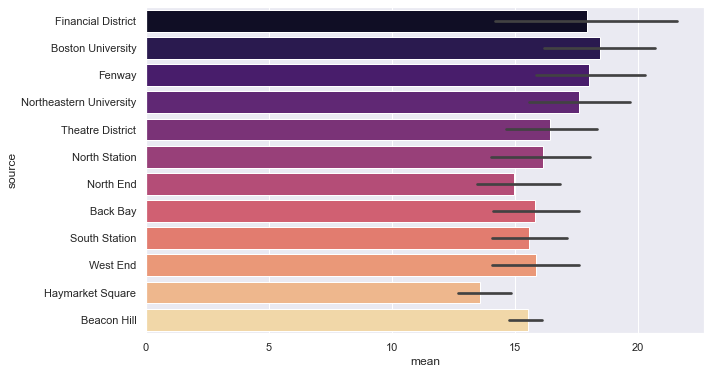

In [26]:
location_price.sort_values('mean', ascending=False, inplace=True)
sns.set(rc={'figure.figsize':(10, 6)})

sns.barplot(x = 'mean', 
            y = 'source', 
            data = location_price, 
            palette = 'magma')

In [27]:
location_price.drop(columns=['mean'], inplace=True)
print('Highest Price :')
print(location_price.head(1).max())
print('')
print('Lowest price:')
print(location_price.tail(1).min())

Highest Price :
name
source          Financial District
destination      Boston University
Black                    34.228923
Black SUV                43.572633
Lux                      28.366481
Lux Black                37.477747
Lux Black XL             46.765647
Lyft                     14.248957
Lyft XL                  24.299722
Shared                    9.324757
Taxi                          13.5
UberPool                  13.40013
UberX                    14.824903
UberXL                   25.151751
WAV                      14.824903
dtype: object

Lowest price:
name
source          Haymarket Square
destination        North Station
Black                  15.613158
Black SUV              26.877632
Lux                    10.797636
Lux Black              16.604312
Lux Black XL           26.926287
Lyft                    7.018081
Lyft XL                 9.166898
Shared                   4.06815
Taxi                        13.5
UberPool                6.789474
UberX                   

**Conclusion :**


From dataset :
- The trip with **the highest average price is from the Financial District to Boston University** which is 24.61 USD. The most expensive service trip, Lyft's Lux Black XL is priced at 46.77 USD and the cheapest is Lyft's Shared at 9.32 USD.


- The trip with **the lowest average price is from Haymarket Square to North Station** which is 12.42 USD. The most expensive service for the trip, Lyft's Lux Black XL is priced at 26.92 USD and the cheapest service is Lyft's Shared at 4.07 USD.

# Data Preprocessing 

#### Removing Unnecessary Features

We can exclude the following features from the analysis :
- id: just the id of the observation, we should not include this as it provide no information
- datetime: already reflect in 'hour', 'day' and 'month'
- timezone: only one time zone
- timestamp: similar to 'datetime'

In [28]:
df_new = df.drop(['id', 'datetime', 'timezone', 'timestamp'], axis=1)

Removed features 'time' and 'id' as they are not related to target('price'). Next, analyze the **target relationship**:

In [29]:
df_new.corr().abs().loc['price'].sort_values(ascending=False).head()

price               1.000000
distance            0.328601
surge_multiplier    0.243286
latitude            0.001922
visibility          0.001574
Name: price, dtype: float64

It can be seen that the correlation between (**temperature, visibility, climate**) and price is very weak, so a drop is made. **latitude and longitude** have nothing to do with the target (price)

Next, check out our categorical scores in the data set feature

In [30]:
cat = df_new.select_dtypes(include=['object','category']).columns.tolist()
for column in df_new[cat]:
    print(f'{column} : {df_new[column].unique()}')
    print()

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear '

It can be seen in the **product_id** variable there are many undefined categories
so that the 'product_id' variables can be dropped

In [31]:
df_new = df_new.drop(['product_id'], axis=1)

In [32]:
df_new.head()

hour  day  month            source    destination cab_type          name  \
0     9   16     12  Haymarket Square  North Station     Lyft        Shared   
1     2   27     11  Haymarket Square  North Station     Lyft           Lux   
2     1   28     11  Haymarket Square  North Station     Lyft          Lyft   
3     4   30     11  Haymarket Square  North Station     Lyft  Lux Black XL   
4     3   29     11  Haymarket Square  North Station     Lyft       Lyft XL   

   price  distance  surge_multiplier  latitude  longitude  temperature  \
0    5.0      0.44               1.0   42.2148    -71.033        42.34   
1   11.0      0.44               1.0   42.2148    -71.033        43.58   
2    7.0      0.44               1.0   42.2148    -71.033        38.33   
3   26.0      0.44               1.0   42.2148    -71.033        34.38   
4    9.0      0.44               1.0   42.2148    -71.033        37.44   

   apparentTemperature    short_summary  \
0                37.12   Mostly Cloudy    
1                37.35            Rain    
2                32.93           Clear    
3                29.63           Clear    
4                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                  1543460400   partly-cloudy-night    

   dewPoint  pressure  windBearing  cloudCover  uvIndex  visibility.1  ozone  \
0     32.70   1021.98           57        0.72        0        10.000  303.8   
1     41.83   1003.97           90        1.00        0         4.786  291.1   
2     31.10    992.28          240        0.03        0        10.000  315.7   
3     26.64   1013.73          310        0.00        0        10.000  291.1   
4     28.61    998.36          303        0.44        0        10.000  347.7   

   sunriseTime  sunsetTime  moonPhase  precipIntensityMax  uvIndexTime  \
0   1544962084  1544994864      

## Encoding

In [33]:
df_new = df_new[['source','destination','cab_type','name', 'short_summary', 'long_summary','distance','surge_multiplier','price']]
df_new

source    destination cab_type          name  \
0       Haymarket Square  North Station     Lyft        Shared   
1       Haymarket Square  North Station     Lyft           Lux   
2       Haymarket Square  North Station     Lyft          Lyft   
3       Haymarket Square  North Station     Lyft  Lux Black XL   
4       Haymarket Square  North Station     Lyft       Lyft XL   
...                  ...            ...      ...           ...   
693066          West End      North End     Uber        UberXL   
693067          West End      North End     Uber         UberX   
693068          West End      North End     Uber          Taxi   
693069          West End      North End     Uber     Black SUV   
693070          West End      North End     Uber      UberPool   

          short_summary                                       long_summary  \
0        Mostly Cloudy                           Rain throughout the day.    
1                 Rain    Rain until morning, starting again in the eve...   
2                Clear                         Light rain in the morning.    
3                Clear                  Partly cloudy throughout the day.    
4        Partly Cloudy                  Mostly cloudy throughout the day.    
...                 ...                                                ...   
693066   Partly Cloudy           Light rain in the morning and overnight.    
693067   Partly Cloudy           Light rain in the morning and overnight.    
693068   Partly Cloudy           Light rain in the morning and overnight.    
693069   Partly Cloudy           Light rain in the morning and overnight.    
693070   Partly Cloudy           Light rain in the morning and overnight.    

        distance  surge_multiplier  price  
0           0.44               1.0    5.0  
1           0.44               1.0   11.0  
2           0.44               1.0    7.0  
3           0.44               1.0   26.0  
4           0.44               1.0    9.0  
...          ...               ...    ...  
693066      1.00               1.0   13.0  
693067      1.00               1.0    9.5  
693068      1.00               1.0   13.5  
693069      1.00               1.0   27.0  
693070      1.00               1.0   10.0  

[693071 rows x 9 columns]

Check the correlation of categorical features with target feature (price)

In [34]:
#Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns=['source','destination','cab_type','name', 'short_summary', 'long_summary','distance','surge_multiplier','price']))
])

#Membuat variabel df_rfe untuk menampung hasil encode
df_new = encoding_pipeline.fit_transform(df_new)

In [35]:
df_new.head()

source  destination  cab_type  name  short_summary  long_summary  distance  \
0       5            7         0     7              4             9        15   
1       5            7         0     2              8            10        15   
2       5            7         0     5              0             2        15   
3       5            7         0     4              0             6        15   
4       5            7         0     6              6             4        15   

   surge_multiplier  price  
0                 0      4  
1                 0     20  
2                 0      8  
3                 0     53  
4                 0     14

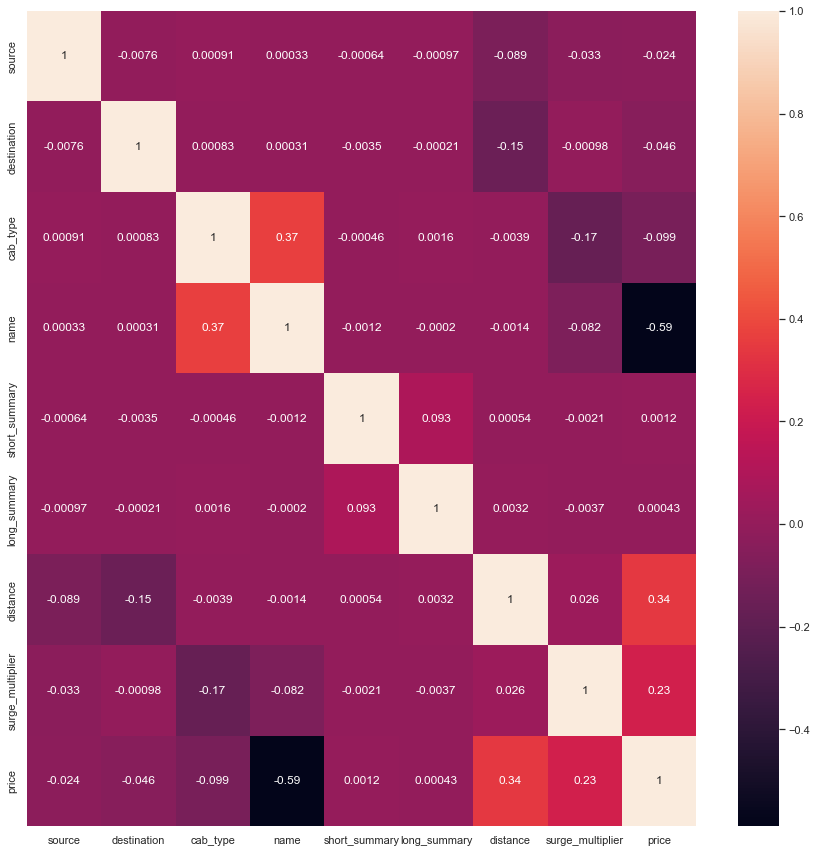

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

It can be seen that the furthest relationship with price is **long_summary** variable. So the long_summary variable need to be dropped

In [37]:
df_new =df_new.drop(['long_summary'],axis=1)

print(df_new.shape)
df_new.head()

(693071, 8)


source  destination  cab_type  name  short_summary  distance  \
0       5            7         0     7              4        15   
1       5            7         0     2              8        15   
2       5            7         0     5              0        15   
3       5            7         0     4              0        15   
4       5            7         0     6              6        15   

   surge_multiplier  price  
0                 0      4  
1                 0     20  
2                 0      8  
3                 0     53  
4                 0     14

## Remove Outlier

Removing outliers:

In [38]:
Q1 = df_new['price'].quantile(0.25)
Q3 = df_new['price'].quantile(0.75)
IQR = Q3 - Q1
 
print("Old Shape: ", df_new.shape)
 
df_new= df_new[~((df_new['price']>(Q3+(1.5*IQR))))]

print("New Shape: ", df_new.shape)
df_new

Old Shape:  (693071, 8)
New Shape:  (687940, 8)


source  destination  cab_type  name  short_summary  distance  \
0            5            7         0     7              4        15   
1            5            7         0     2              8        15   
2            5            7         0     5              0        15   
3            5            7         0     4              0        15   
4            5            7         0     6              6        15   
...        ...          ...       ...   ...            ...       ...   
693066      11            6         1    11              6        71   
693067      11            6         1    10              6        71   
693068      11            6         1     8              6        71   
693069      11            6         1     1              6        71   
693070      11            6         1     9              6        71   

        surge_multiplier  price  
0                      0      4  
1                      0     20  
2                      0      8  
3                      0     53  
4                      0     14  
...                  ...    ...  
693066                 0     25  
693067                 0     16  
693068                 0     26  
693069                 0     55  
693070                 0     17  

[687940 rows x 8 columns]

##  Dataset Split

In [39]:
X = df_new.drop(columns=['price'],axis=1)
y = df_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('shape dari X and y  (train) :', X_train.shape, y_train.shape)
print('shape dari X and y  (test) :', X_test.shape, y_test.shape)

shape dari X and y  (train) : (481558, 7) (481558,)
shape dari X and y  (test) : (206382, 7) (206382,)


## Model Definition

After doing data cleaning and data preprocessing, the data obtained will be used for the next model training. There are 3 variables **(price, distance, surge_multiplier)** that will be used to create a price estimate model .

The test **method that will be used in this project is the Linear Regression method**. 

Linear Regression is one of the best known and simplest ways to predict output, which fits into a linear model to minimize the sum of the squares remaining between the predicted value and the true value. Although the main disadvantage of linear regression is that it assumes linearity between the predicted variable and the response variable, the data are rarely linearly separable in the real world.

Whereas Random Forest works because it combines predictions from several machine learning algorithms to make predictions that are more accurate than individual models. It uses low bias and high variance to reduce errors.

### Linear Regression

In linear regression we will require 2 set of variables. One is the dependent variable(termed as  $\hat{y}$ ) and second the independent variable(termed as  $\hat{x}$ ). Mostly the task relies upon correctly predicting the  $\hat{y}$  with the help of a combination of $\hat{x}$.

Typically, a regression analysis is used for one (or more) of three purposes:
1. modeling the relationship between x and y;
2. prediction of the target variable (forecasting);
3. and testing of hypotheses.

#### The Model

The data consist of n sets of observations  $x_{1i},x_{2i},...,x_{ni},y_i$ , which represent a random sample from a larger population. It is assumed that these observations satisfy a linear relationship, 

$$y_i = \beta_0 + \beta_{1}{x_{1i}} + \varepsilon_1$$

It is important to recognize that this, or any statistical model, is not viewed as a true representation of reality; rather, the goal is that the model be a useful representation of reality. A model can be used to explore the relationships between variables and make accurate forecasts based on those relationships even if it is not the "truth."

#### Estimation Using Least Squares

A primary goal of a regression analysis is to estimate this relationship, or equivalently, to estimate the unknown parameters  β . This requires a data-based rule, or criterion, that will give a reasonable estimate.

The target of least-square method is to minimize this fucntion:
> $$\sum_{i=1}^{n}[y_i - (\beta_0+\beta_1x_{1i}+....+\beta_px_{pi})]^2$$ The difference between the fitted and actual value is termed as residual.

Analytically the solution for the regression coefficient can be found from this equation:
>$$\hat{\beta}=(X'X)^{-1}X'y$$

It implise that our Hypothesis for analytical approach of linear regression:
>$$\hat{y}=X\hat{\beta}=X(X'X)^{-1}X'y\equiv Hy$$

#### Hypothesis Tests

There are two types of hypothesis tests related to the regression coefficients of immediate interest.
1. Do any of the predictors provide predictive power for the target variable? This is a test of the overall significance of the regression,
>$$H_0 : \beta_1 = ... = \beta_p = 0$$
versus
$$H_\alpha : some \beta_j \ne 0 \quad j=1,... ,p$$ \
The test of these hypothesis is the F-test,
$$F = \frac{Regression MS}{Residual MS}=\frac{Regression SS/p}{Residual SS/(n-p-1)}$$

2. Given the other variables in the model, does a particular predictor provide additional predictive power? This corresponds to a test of the significance of an individual coefficient,
>$$H_0 : \beta_j=0, \quad j=1,...,p$$
versus
$$H_\alpha : \beta_j\ne0$$
This is tested using a t-test, 
$$t_j=\frac{\hat{\beta_j}}{\hat{s.e.}(\hat{\beta_j})}$$

## Create Model, Train and Evaluation  

### Linear Regression

In [40]:
reg = LinearRegression()
model_reg = reg.fit(X_train,y_train)
y_pred=model_reg.predict(X_test)

R2_score_reg = r2_score(y_test, y_pred)
print(f'R2 score_reg : {R2_score_reg: .6f}')

MAE_reg = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error_reg: {MAE_reg:.6f}')

MSE_reg = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error_reg : {MSE_reg:.6f}') 


R2 score_reg :  0.500870
Mean Absolute Error_reg: 10.911454
Mean Squared Error_reg : 186.335377


### Ridge Regression

In [41]:
ridge = Ridge(alpha=0.1, max_iter=1000, tol=0.001)
model_ridge = ridge.fit(X_train,y_train)
y_pred2=model_ridge.predict(X_test)

R2_score_ridge = r2_score(y_test, y_pred2)
print(f'R2 score_lasso : {R2_score_ridge: .6f}')

MAE_ridge = mean_absolute_error(y_test, y_pred2)
print(f'Mean Absolute Error_lasso: {MAE_ridge:.6f}')

MSE_ridge = mean_squared_error(y_test, y_pred2)
print(f'Mean Squared Error_lasso : {MSE_ridge:.6f}') 


R2 score_lasso :  0.500870
Mean Absolute Error_lasso: 10.911455
Mean Squared Error_lasso : 186.335377


### Lasso Regression

In [42]:
lasso = linear_model.Lasso(alpha=0.001, max_iter=100, tol=0.01)
model_lasso = lasso.fit(X_train,y_train)
y_pred3=model_lasso.predict(X_test)

R2_score_lasso = r2_score(y_test, y_pred3)
print(f'R2 score_lasso : {R2_score_reg: .6f}')

MAE_lasso = mean_absolute_error(y_test, y_pred3)
print(f'Mean Absolute Error_lasso: {MAE_lasso:.6f}')

MSE_lasso = mean_squared_error(y_test, y_pred3)
print(f'Mean Squared Error_lasso : {MSE_lasso:.6f}') 

R2 score_lasso :  0.500870
Mean Absolute Error_lasso: 10.911602
Mean Squared Error_lasso : 186.335711


In [43]:
model = pd.Series(['Linear Regression', 'Lasso', 'Ridge'])
R2_score = pd.Series([R2_score_reg, R2_score_ridge, R2_score_lasso ])
MAE_score = pd.Series([MAE_reg, MAE_ridge, MAE_lasso ])
MSE_score = pd.Series([MSE_reg, MSE_ridge, MSE_lasso ])

regression = pd.DataFrame({'Regression': model, 'R2_score': R2_score, 'MAE_score': MAE_score, 'MSE_score': MSE_score})
regression


Regression  R2_score  MAE_score   MSE_score
0  Linear Regression  0.500870  10.911454  186.335377
1              Lasso  0.500870  10.911455  186.335377
2              Ridge  0.500869  10.911602  186.335711

# Model Interference

In [44]:
df_new.head()

source  destination  cab_type  name  short_summary  distance  \
0       5            7         0     7              4        15   
1       5            7         0     2              8        15   
2       5            7         0     5              0        15   
3       5            7         0     4              0        15   
4       5            7         0     6              6        15   

   surge_multiplier  price  
0                 0      4  
1                 0     20  
2                 0      8  
3                 0     53  
4                 0     14

In [45]:
df_new.describe()

source    destination       cab_type           name  \
count  687940.000000  687940.000000  687940.000000  687940.000000   
mean        5.504165       5.503419       0.559095       6.070490   
std         3.451748       3.452631       0.496496       3.785331   
min         0.000000       0.000000       0.000000       0.000000   
25%         3.000000       3.000000       0.000000       3.000000   
50%         6.000000       6.000000       1.000000       6.000000   
75%         9.000000       9.000000       1.000000       9.000000   
max        11.000000      11.000000       1.000000      12.000000   

       short_summary       distance  surge_multiplier          price  
count  687940.000000  687940.000000     687940.000000  687940.000000  
mean        4.260590     187.866138          0.044723      30.540614  
std         2.002318     109.703463          0.315268      19.295846  
min         0.000000       0.000000          0.000000       0.000000  
25%         4.000000      98.000000          0.000000      16.000000  
50%         5.000000     185.000000          0.000000      26.000000  
75%         5.000000     260.000000          0.000000      46.000000  
max         8.000000     548.000000          6.000000      91.000000

In [46]:
df_new.columns

Index(['source', 'destination', 'cab_type', 'name', 'short_summary',
       'distance', 'surge_multiplier', 'price'],
      dtype='object')

### Input Value

In [47]:
v1 = [5, 7, 0, 7, 8, 15, 0]
v2 = [11, 6, 1, 1, 6, 71, 1]

value = [v1, v2]
value

[[5, 7, 0, 7, 8, 15, 0], [11, 6, 1, 1, 6, 71, 1]]

In [48]:
data = pd.DataFrame(value,  columns= ['source','destination','cab_type','name','short_summary','distance','surge_multiplier'])

data

source  destination  cab_type  name  short_summary  distance  \
0       5            7         0     7              8        15   
1      11            6         1     1              6        71   

   surge_multiplier  
0                 0  
1                 1

### Try prediction with data

In [49]:
predict = reg.predict(data)
print("The Result of Linear Regression Predict: \n")
print('The Predict of Price route v1 is {}'.format(round(predict[0],2)))
print('The Predict of Price route v2 is {} '.format(round(predict[1],2)))

The Result of Linear Regression Predict: 

The Predict of Price route v1 is 13.48
The Predict of Price route v2 is 51.45 


# Overall

In [50]:
pickle.dump(model_reg, open('model_reg.pkl','wb'))

This is the **overall conclusion** of modelling services price prediction of uber/lyft:
1. From 57 existing attributes, 8 of the most influential attributes in services price predictions are taken, including source, destination, cab_type, name, short_summary, distance, surge_multiplier and the response is price variable.
2. The test method uses 3 models, namely linear regression, Ridge Regression, and Lasso Regression with accuracy values of 0.500870 all three and errors that are not much different